In [1]:
import sys
import os

parent = os.path.dirname(os.path.realpath('../'))
sys.path.append(parent)

import numpy as np
# import open3d as o3d
import matplotlib.pyplot as plt

from musik import *

from utils import geometry
import tqdm

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
test_experiment = experiment.Experiment.load('/home/trevor/repos/MUSiK/demos/usgr/TTE_test')
test_experiment.run(dry=True)

dry run of simulation


100%|██████████| 2/2 [00:00<00:00, 55.94it/s]


In [3]:
test_reconstruction = reconstruction.DAS(experiment=test_experiment)

In [4]:
signals = test_reconstruction.get_signals(
    dimensions=2, matsize=512, downsample=1, workers=32, tgc=10
)

100%|██████████| 32/32 [00:23<00:00,  1.37it/s]
2it [00:01,  1.82it/s]


In [ ]:
# Save raw signals as npz files:
# np.savez('signals.npz', signals=signals)

In [ ]:
# signals = np.load('/data/trevor/overflow/TTE_test/signals.npz')['signals']

In [ ]:
# compute percentiles
p0 = np.nanpercentile(signals, 0)
p95 = np.nanpercentile(signals, 97.5)

# clip and normalize
signals_clipped = np.clip(signals, p0, p95)
signals_normalized = (signals_clipped - p0) / (p95 - p0) * 255

# replace NaNs
signals_normalized = np.nan_to_num(signals_normalized, nan=127).astype(np.uint8)  # or nan=127, nan=255, etc.

In [41]:
# from PIL import Image

# img_dir = 'TTE_test'

# # Save all the normalized signals as 8-bit PNG files
# os.makedirs(img_dir, exist_ok=True)
# for i in tqdm.tqdm(range(signals_normalized.shape[0])):
#     Image.fromarray(signals_normalized[i]).save(f'{img_dir}/signals_{i}.png')


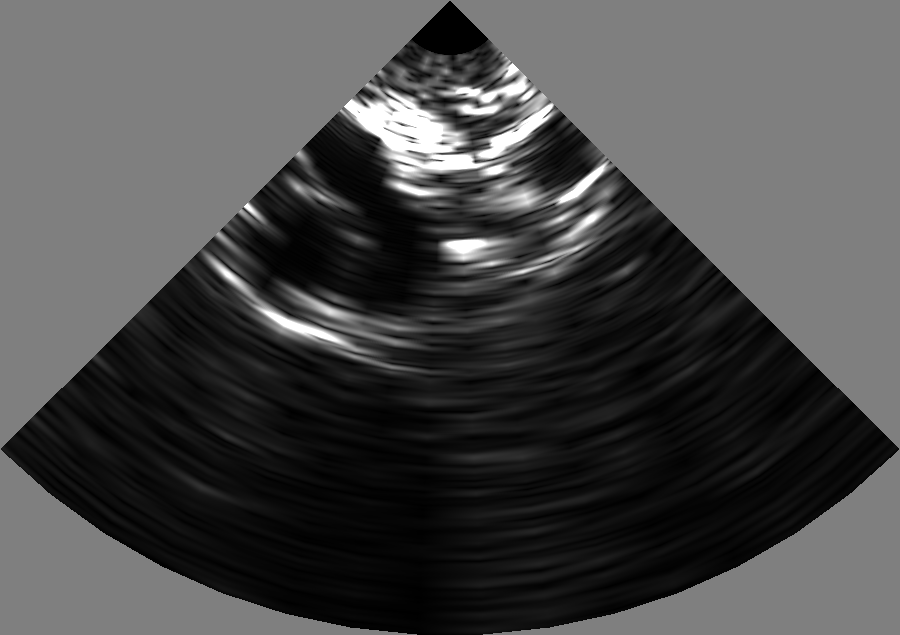

In [57]:
from PIL import Image
Image.fromarray(signals_normalized[0])

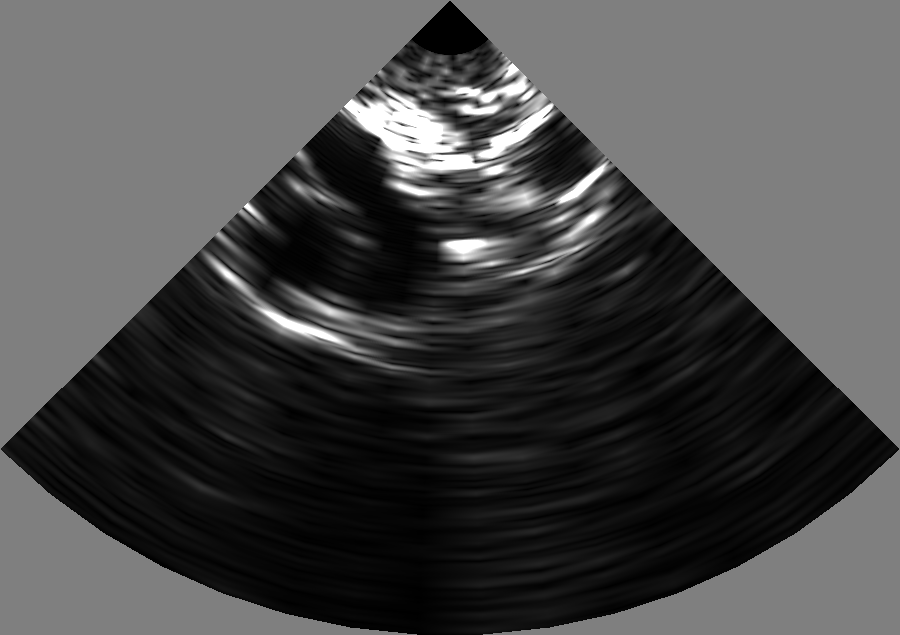

In [58]:
Image.fromarray(signals_normalized[0])